In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Load the dataset
df = pd.read_csv('/content/loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
# Display basic info
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


None

In [4]:
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [5]:
df.columns = df.columns.str.strip()

In [6]:
df['education'] = df['education'].str.strip()
df['self_employed'] = df['self_employed'].str.strip()
df['loan_status'] = df['loan_status'].str.strip()
print("Unique Education Values:", df['education'].unique())
print("Unique Self Employed Values:", df['self_employed'].unique())
print("Unique Loan Status Values:", df['loan_status'].unique())

# Step 3: Manual Encoding
df['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})
df['education'] = df['education'].map({'Graduate': 1, 'Not Graduate': 0})
df['self_employed'] = df['self_employed'].map({'Yes': 1, 'No': 0})

Unique Education Values: ['Graduate' 'Not Graduate']
Unique Self Employed Values: ['No' 'Yes']
Unique Loan Status Values: ['Approved' 'Rejected']


In [7]:
numerical_cols = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                   'residential_assets_value', 'commercial_assets_value',
                   'luxury_assets_value', 'bank_asset_value']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [8]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [9]:
import warnings
warnings.filterwarnings("ignore", message=".*tight_layout.*")

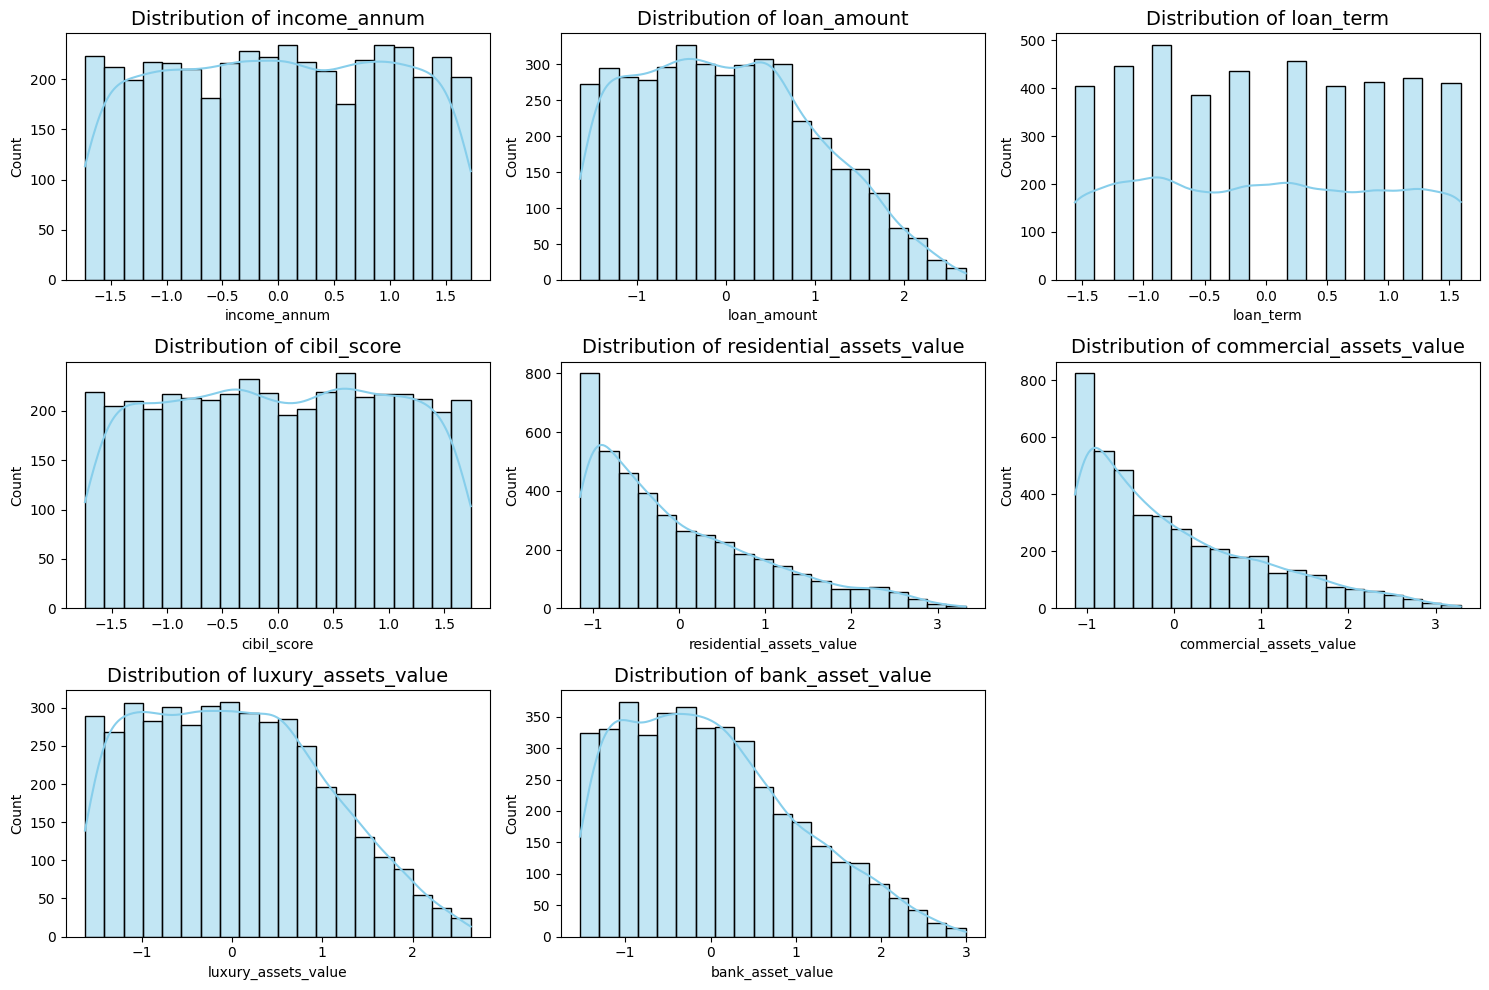

In [10]:
numerical_cols = numerical_cols[:9]

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14)

plt.tight_layout()
plt.show()

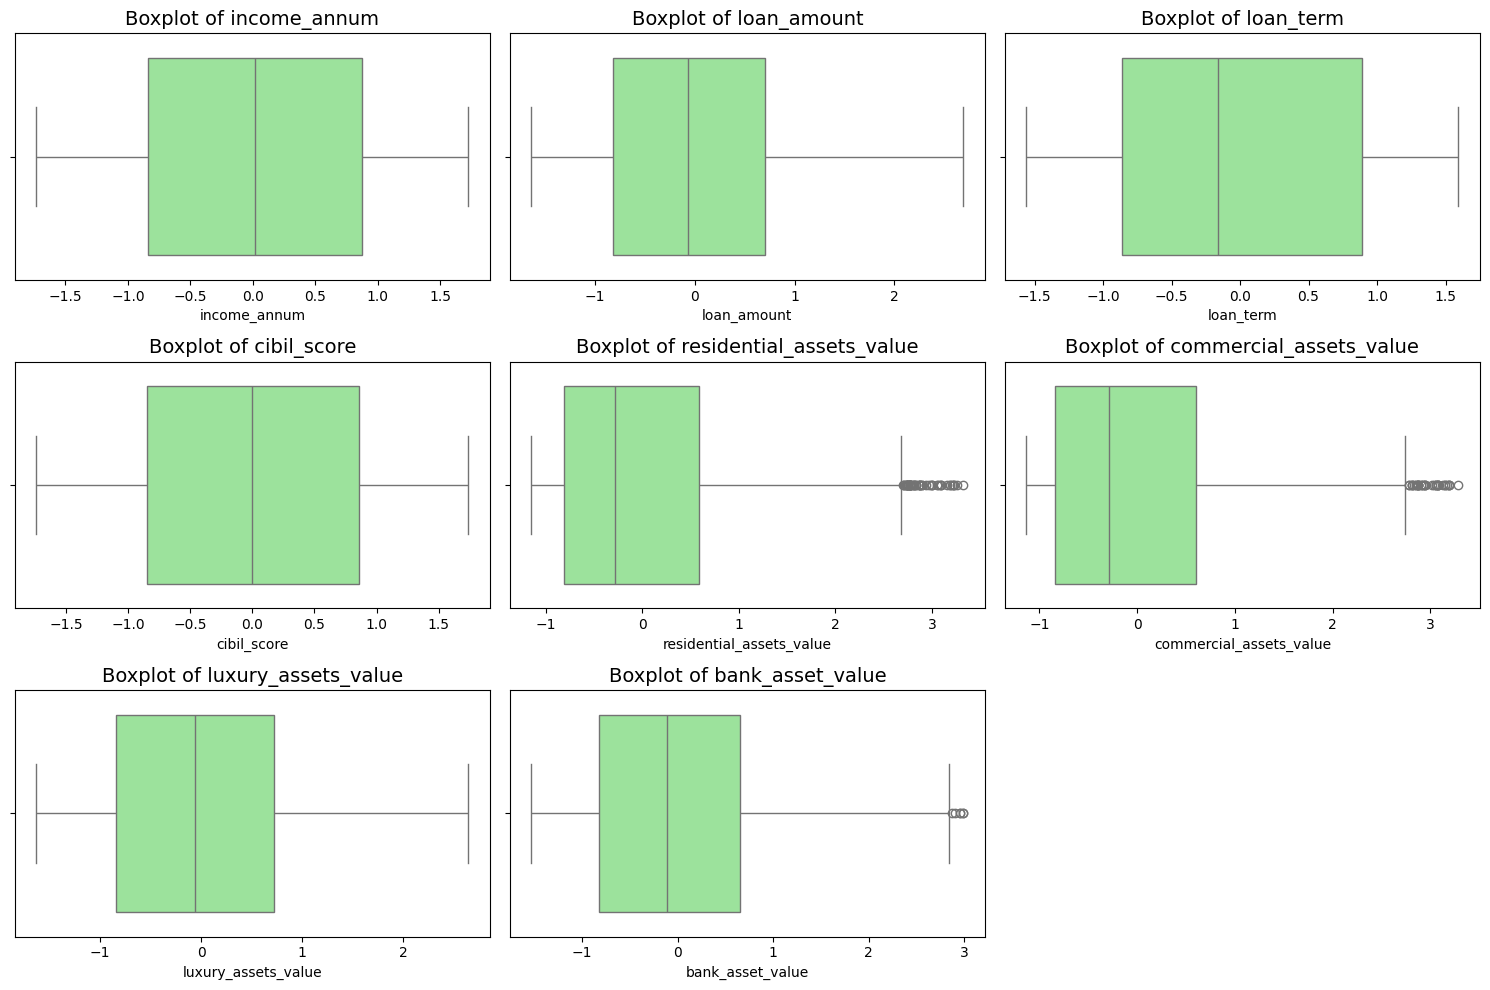

In [11]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)  # 3x3 grid for boxplots
    sns.boxplot(data=df, x=col, color='lightgreen')
    plt.title(f'Boxplot of {col}', fontsize=14)
plt.tight_layout()
plt.show()

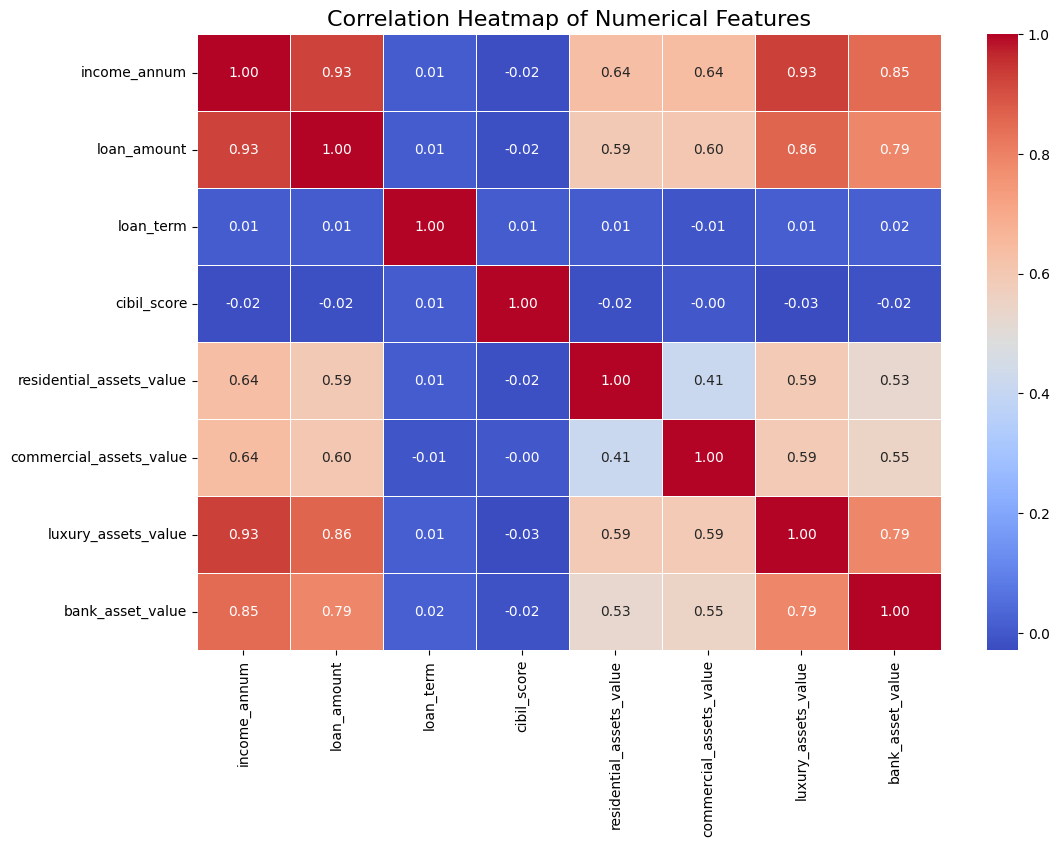

In [12]:
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()

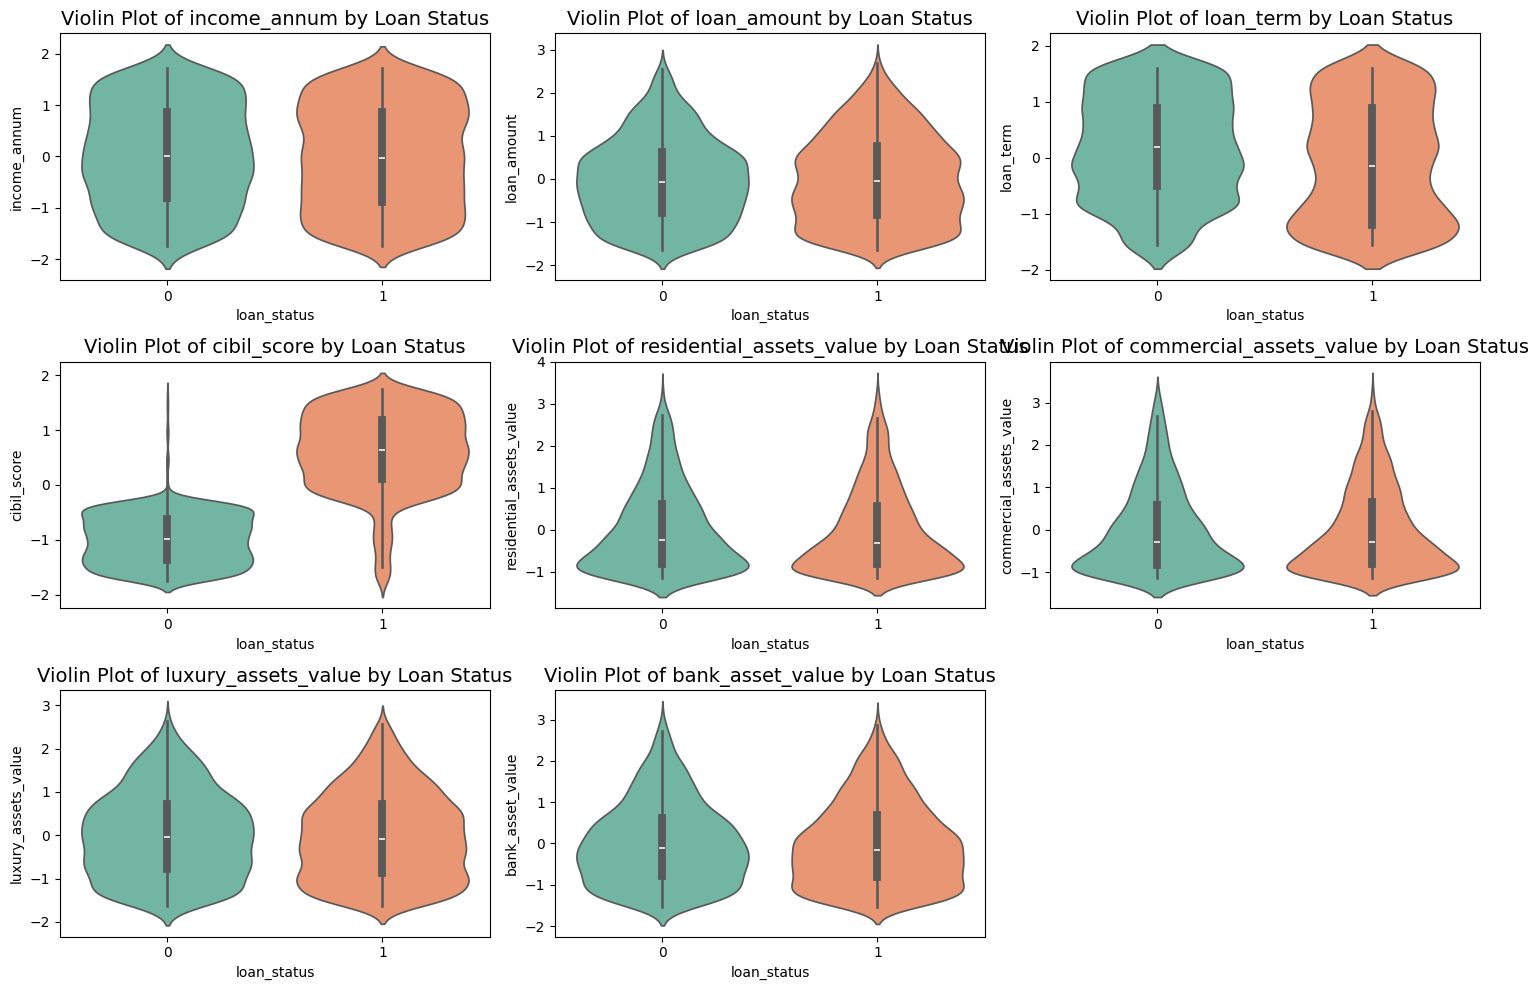

In [13]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)  # 3x3 grid for violin plots
    sns.violinplot(x=df['loan_status'], y=df[col], hue=df['loan_status'], palette='Set2', legend=False)
    plt.title(f'Violin Plot of {col} by Loan Status', fontsize=14)
plt.tight_layout()
plt.show()



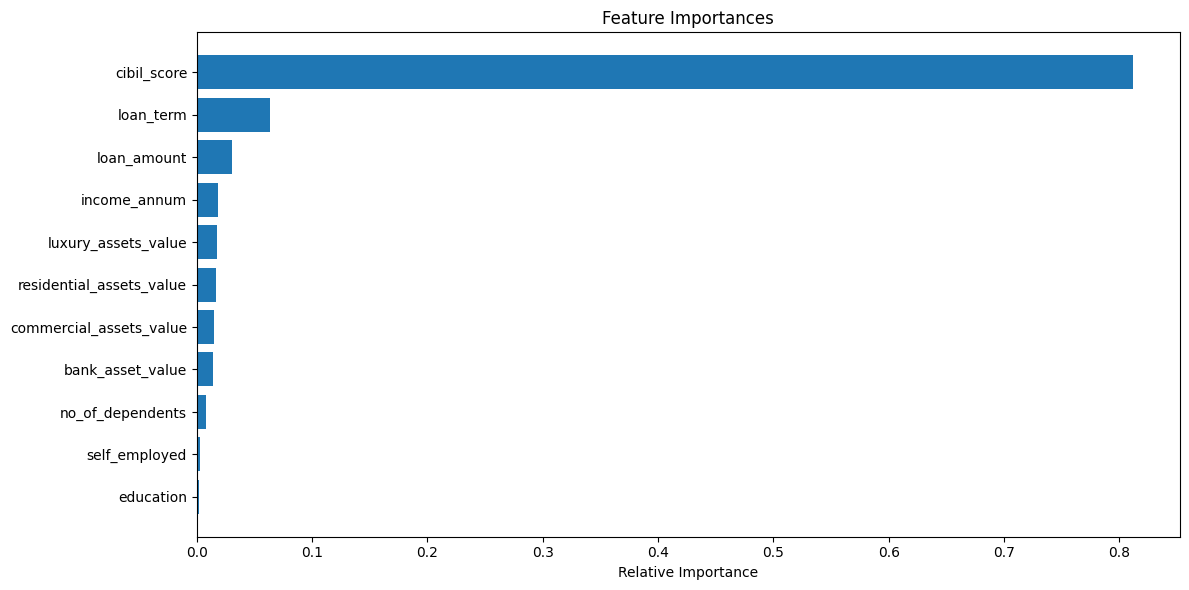

In [14]:
from sklearn.ensemble import RandomForestClassifier
X = df.drop(columns=['loan_status', 'loan_id'])
y = df['loan_status']
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, y)
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [16]:

# Drop target variable from features
X = df.drop(columns=['loan_status', 'loan_id'])
y = df['loan_status']

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify Numerical and Categorical Columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

#  Feature Selection (Remove Low-Importance Features)
features_to_remove = [
    'self_employed', 'education', 'no_of_dependents'
]

X_train = X_train.drop(columns=features_to_remove)
X_test = X_test.drop(columns=features_to_remove)

In [17]:
# Preprocessing Pipelines
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

In [22]:
# Define the Model Pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        bootstrap=True,
        random_state=42))])


In [23]:
# Define Hyperparameter Grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [8, 12],
    'classifier__min_samples_split': [10, 15],
    'classifier__min_samples_leaf': [5, 10],
    'classifier__max_features': ['sqrt']
}

In [24]:
# Identify numerical and categorical columns AFTER removing unimportant features
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Update preprocessor pipelines
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical variables
])

# Update ColumnTransformer with the new feature set
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Define the model pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


In [25]:
# Hyperparameter Tuning with GridSearchCV
grid_search = GridSearchCV(model_pipeline, param_grid, cv=10, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the Best Model from Grid Search
best_model = grid_search.best_estimator_

#  Evaluate the Model
y_pred_best = best_model.predict(X_test)

print(f"Best Model Training Accuracy: {accuracy_score(y_train, best_model.predict(X_train)):.4f}")
print(f"Best Model Test Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best Model Training Accuracy: 0.9956
Best Model Test Accuracy: 0.9778
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       323
           1       0.98      0.99      0.98       531

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854



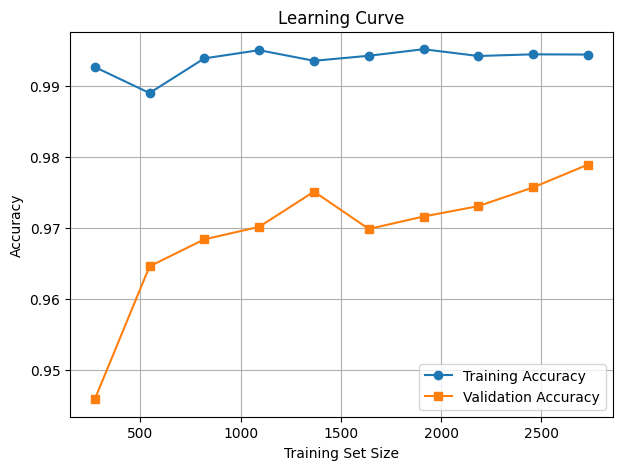

In [23]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(7, 5))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='s')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()


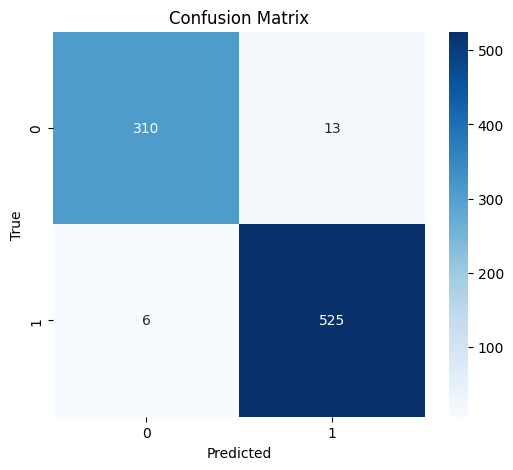

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [25]:
import joblib

# Save the best model
joblib.dump(best_model, 'loan_approval_model.pkl')

['loan_approval_model.pkl']

In [26]:
# Load the trained model
model = joblib.load("./loan_approval_model.pkl")